<a href="https://colab.research.google.com/github/VicentePina7210/DataMiningCleaningExercise/blob/main/BasicMLClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Basic ML Classification

Adapted from the following notebook: https://colab.research.google.com/drive/1qmdfU8tzZ08D3O84qaD11Ffl9YuNUvlD#scrollTo=TNSeN-ZzybHN

In [2]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

### 1. Load the data

In [1]:
# Download the dataset
# Source of dataset - https://www.kaggle.com/rakeshrau/social-network-ads
!wget "https://drive.google.com/uc?id=15WAD9_4CpUK6EWmgWVXU8YMnyYLKQvW8&export=download" -O data.csv -q

In [3]:
# Load the dataset into a dataframe
data_df = pd.read_csv("data.csv")
data_df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 2. Split the data
We need to split the data BEFORE our dataset analysis

In [4]:
# Split the data 80/20 for train and test
x_train_df, x_test_df, y_train_df, y_test_df = train_test_split(
    data_df[['Age', 'EstimatedSalary']], # x - inputs
    data_df['Purchased'], # y - value to predict
    test_size=0.2
)

# Split the train data 80/20 for train and valid
# NOTE: Take valid out of train
x_train_df, x_valid_df, y_train_df, y_valid_df = train_test_split(
    x_train_df,
    y_train_df,
    test_size=0.2
)

# Final split: 64% train, 16% valid, 20% test

In [5]:
# NOTE: This is a very small dataset
print("Train: ", x_train_df.shape, y_train_df.shape)
print("Valid: ", x_valid_df.shape, y_valid_df.shape)
print("Test: ", x_test_df.shape, y_test_df.shape)

Train:  (256, 2) (256,)
Valid:  (64, 2) (64,)
Test:  (80, 2) (80,)


### 3. Feature Cleaning and Engineering

In [6]:
# Get dataset summary statistics
x_train_df.describe()

,Age,EstimatedSalary
count,256.000000,256.000000
mean,37.207031,68226.562500
std,10.273901,34409.236071
min,18.000000,15000.000000
25%,29.000000,42000.000000
50%,37.000000,63000.000000
75%,45.000000,85000.000000
max,60.000000,150000.000000


In [7]:
# Feature cleaning and engineering
# ...

In [8]:
# Will talk more about feature engineering later

### 4. Model training

In [9]:
# Convert dataframes to numpy arrays
x_train, y_train = x_train_df.values, y_train_df.values
x_valid, y_valid = x_valid_df.values, y_valid_df.values
x_test, y_test = x_test_df.values, y_test_df.values

[Q] How can we adjust the models to be higher bias or higher variance

In [10]:
# Instantiate the model
model = LogisticRegression()

# Fit the model - training (fit is supervised for two inputs)
model = model.fit(
    x_train,
    y_train
)

In [23]:
# Instantiate the model
model = tree.DecisionTreeClassifier(max_depth=5) # Set model hyperparameters

# Fit the model - training
model = model.fit(
    x_train,
    y_train
)

[Q] Why is validation accuracy higher or lower than training accuracy?
The model is already familiar with the training accuracy so in most cases the model will have a lower accuracy on the validation set.

[Q] How do we tell if the model is overfitting or underfitting
the model would be overfitting if it captures all or the vast majority of the noise. If it underfits we will see that there seems to be no logical reasoning in the model.

[Q] What changes will lead to overfitting/underfitting?
increasing max_depth will lead to overfitting
decreasing max_depth will lead to underfitting

exposing the test data to the model will lead to overfitting
insufficient data can lead to underfitting

[Q] Why do these changes lead to overfitting/underfitting
increasing the number for the max depth is more likely to lead to overfitting because it allows the model to get too specific and create too much of a criteria for predictions that will defeat the underminethe goal of generalizing. On the other hand, if we decrease the max depth by too much then we will not be able to create a good generalization because there will not be enough data.

In [20]:
# Training and validation metrics
y_train_pred = model.predict(x_train)

print(
    "Train:",
    classification_report(
        y_train,
        y_train_pred,
        target_names=["Purchased", "Not purchased"]
    )
)

y_valid_pred = model.predict(x_valid)

print(
    "Valid:",
    classification_report(
        y_valid,
        y_valid_pred,
        target_names=["Purchased", "Not purchased"]
    )
)

Train:                precision    recall  f1-score   support

    Purchased       0.83      0.94      0.89       163
Not purchased       0.87      0.67      0.76        93

     accuracy                           0.84       256
    macro avg       0.85      0.81      0.82       256
 weighted avg       0.85      0.84      0.84       256

Valid:                precision    recall  f1-score   support

    Purchased       0.88      0.86      0.87        43
Not purchased       0.73      0.76      0.74        21

     accuracy                           0.83        64
    macro avg       0.80      0.81      0.81        64
 weighted avg       0.83      0.83      0.83        64



[Q] What is the effect of a smaller validation dataset on our estimate of model performance?

In [21]:
# Get a random subset of the validation set
indices = np.arange(x_valid.shape[0]) # Define all indices
np.random.shuffle(indices) # Shuffle indices
indices = indices[:50] # Take a subset of the indices

# Training and validation metrics
y_valid_pred = model.predict(x_valid)

print(
    classification_report(
        y_valid[indices],
        y_valid_pred[indices],
        target_names=["Purchased", "Not purchased"]
    )
)

               precision    recall  f1-score   support

    Purchased       0.85      0.82      0.84        34
Not purchased       0.65      0.69      0.67        16

     accuracy                           0.78        50
    macro avg       0.75      0.76      0.75        50
 weighted avg       0.78      0.78      0.78        50



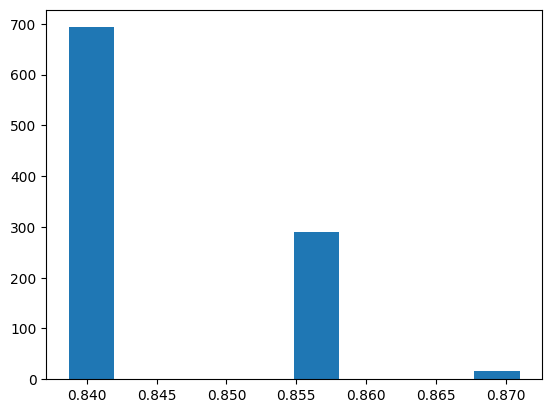

In [14]:
# Make prediction on validation set
y_valid_pred = model.predict(x_valid)

valid_accuracies = []
for i in range(1000):
    indices = np.arange(x_valid.shape[0])
    np.random.shuffle(indices)
    indices = indices[:62]

    valid_accuracies.append(
        sum(y_valid_pred[indices] == y_valid[indices]) / len(indices)
    )

# Plot accuracies
plt.hist(valid_accuracies, bins=10)
plt.show()

### 5. Model final test

In [15]:
# Test model performance - see which model does the best
y_test_pred = model.predict(x_test)

print(
    classification_report(
        y_test,
        y_test_pred,
        target_names=["Purchased", "Not purchased"]
    )
)

               precision    recall  f1-score   support

    Purchased       0.98      0.86      0.92        51
Not purchased       0.80      0.97      0.88        29

     accuracy                           0.90        80
    macro avg       0.89      0.91      0.90        80
 weighted avg       0.91      0.90      0.90        80

